In [1]:
from pylab import *
from dynamics import *
from collections import Counter
from scipy.stats import poisson

module loaded at  2020-06-23 14:51:02.748940


In [2]:
d,c = 1,2
N1, N2, cout, dout = (10000,10000,c,d)
J = create_graph(cout, dout, N1, N2)
simulation = array(replics_parallel(J))


Process ForkPoolWorker-2:
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/miniconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/opt/miniconda3/lib/python3.7/multiprocessing/pool.py", line 47, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
  File "/Users/giuseppe/Documents/GitHub/Percolation-GRN/Section-4/gene-knockout/linear/dynamics.py", line 63, in dynamics_light_parallel
    a = (n * J).toarray()
  File "/opt/miniconda3/lib/python3.7/site-packages/scipy/sparse/base.py", line 481, in __mul__
    return self._mul_sparse_matrix(other)
  File "/opt/miniconda3

KeyboardInterrupt: 

In [9]:
shape(magn_simulation)

NameError: name 'magn_simulation' is not defined

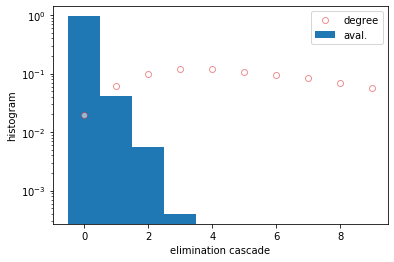

In [15]:
a,b = zip(*Counter(N1-np.count_nonzero(simulation,axis =1)-1).items())
color = 'tab:red'
plot_corrected_Poissoninan_out(d,c,1,[1,10],color=color,mfc = 'w',label='degree')
plt.bar(a,b/sum(b),1,label = 'aval.')
plt.xlabel('elimination cascade')
plt.ylabel('histogram')
plt.legend()
plt.semilogy()
#plt.savefig('linear.pdf')

In [52]:
list(zip(*Counter(N1-np.count_nonzero(simulation,axis =1)).items()))


[(1, 4, 2, 3, 5, 6, 7), (8809, 74, 845, 236, 22, 12, 2)]

In [57]:
def plot_corrected_Poissoninan_out(d,c,alpha,data,*args,**kwargs):
    '''Plot the out degree distribution for the projected graph on genes. '''
    d_out=d+where(alpha>1,alpha-1,0)
    c_out=c+1/alpha
    P=[]
    for k in  arange(max(data)):
        s=0
        for n in arange(5*max(data)):
            s+=poisson.pmf(n, d_out)*poisson.pmf(k, (n+1)*c_out)
        P+=[s]
    plot(arange(max(data)),P,'o',alpha=0.5,*args,**kwargs)
    return P

